# Temporal Trends

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
crimes_df = pd.read_csv('../data/Crimes.csv', parse_dates=['FIRST_OCCURRENCE_DATE', 'LAST_OCCURRENCE_DATE', 'REPORTED_DATE'])

/var/folders/mk/ykv3j_d10z7fbbylyxfw79ym0000gn/T/ipykernel_61987/790143234.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crimes_df = pd.read_csv('../data/Crimes.csv', parse_dates=['FIRST_OCCURRENCE_DATE', 'LAST_OCCURRENCE_DATE', 'REPORTED_DATE'])


In [62]:
crimes_df.head()

,OBJECTID,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,...,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,VICTIM_COUNT,x,y
0,1,DP20256007497,DP20256007497230800,2308,0,theft-from-bldg,larceny,2025-05-24 06:55:00,2025-05-23 23:59:00,2025-05-24 11:32:00,...,-104.980326,39.769260,2,211,five-points,1,0,1,3.146082e+06,1.705501e+06
1,2,DP20248002236,DP20248002236240400,2404,0,theft-of-motor-vehicle,auto-theft,2024-01-08 22:50:00,2024-01-12 00:22:00,2024-01-12 07:22:00,...,-104.673951,39.847478,7,759,dia,1,0,1,3.231944e+06,1.734631e+06
2,3,DP20246003444,DP20246003444239900,2399,0,theft-other,larceny,2024-03-23 15:30:00,2024-03-23 11:15:00,2024-03-23 23:05:00,...,-104.674045,39.851926,7,759,dia,1,0,1,3.231903e+06,1.736251e+06
3,4,DP2025254525,DP2025254525239901,2399,1,theft-bicycle,larceny,2025-05-20 00:00:00,2025-05-19 18:00:00,2025-05-20 22:46:00,...,-104.967691,39.747172,6,622,city-park-west,1,0,1,3.149681e+06,1.697476e+06
4,5,DP20256007167,DP20256007167230800,2308,0,theft-from-bldg,larceny,2025-05-02 02:25:00,2025-05-17 19:25:00,2025-05-18 02:37:00,...,-105.013421,39.757454,1,113,highland,1,0,1,3.136802e+06,1.701149e+06


How do crime rates very by neighborhood over time?

In [63]:
crimes_df['OCCURRENCE_YEAR'] = crimes_df['FIRST_OCCURRENCE_DATE'].dt.year
crimes_df.groupby(['OCCURRENCE_YEAR', 'NEIGHBORHOOD_ID']).size().reset_index(name='COUNT')

,OCCURRENCE_YEAR,NEIGHBORHOOD_ID,COUNT
0,2020,athmar-park,646
1,2020,auraria,357
2,2020,baker,1106
3,2020,barnum,477
4,2020,barnum-west,282
...,...,...,...
463,2025,west-colfax,762
464,2025,west-highland,299
465,2025,westwood,565
466,2025,whittier,170


Are certain types of crimes more prevelant during particular times of the year?

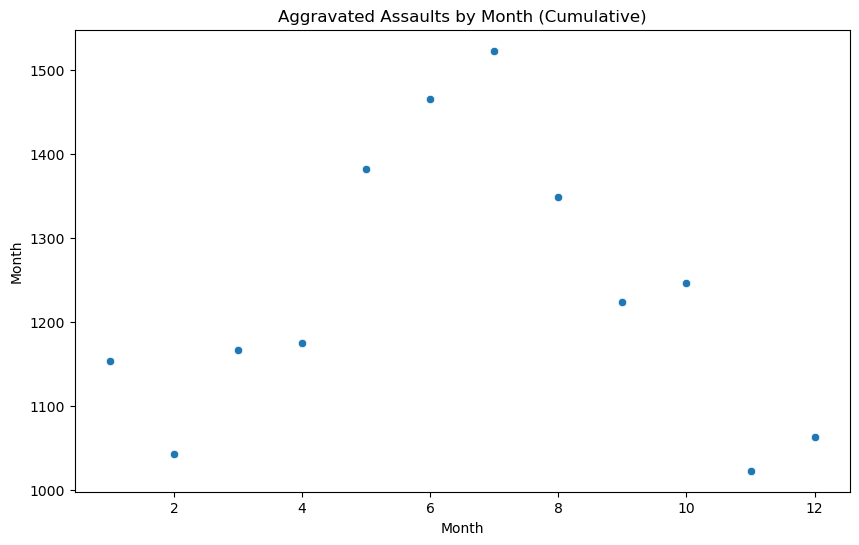

In [64]:
crimes_df['OCCURRENCE_MONTH'] = crimes_df['FIRST_OCCURRENCE_DATE'].dt.month
crimes_df['OCCURRENCE_MONTH_NAME'] = crimes_df['FIRST_OCCURRENCE_DATE'].dt.month_name()
crimes_by_month_df = crimes_df[crimes_df['OFFENSE_CATEGORY_ID'] == 'aggravated-assault'].groupby(['OCCURRENCE_MONTH', 'OCCURRENCE_MONTH_NAME']).size().reset_index(name="COUNT")

plt.figure(figsize=(10, 6))

sns.scatterplot(data=crimes_by_month_df, x='OCCURRENCE_MONTH', y="COUNT")

plt.title('Aggravated Assaults by Month (Cumulative)')
plt.xlabel('Month')
plt.ylabel('Month')

plt.show()

What's the trend in reporting delay?

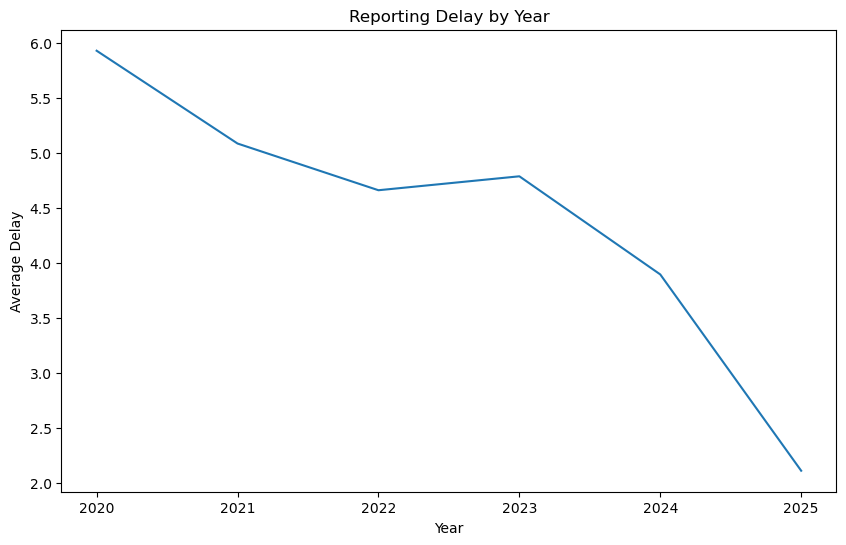

In [65]:
crimes_df['REPORTED_DELAY'] = (crimes_df['REPORTED_DATE'] - crimes_df['FIRST_OCCURRENCE_DATE']).dt.days
crimes_reported_delay_df = crimes_df[['OCCURRENCE_YEAR', 'REPORTED_DELAY']].groupby('OCCURRENCE_YEAR').mean().reset_index()

plt.figure(figsize=(10,6))

sns.lineplot(data=crimes_reported_delay_df, x='OCCURRENCE_YEAR', y='REPORTED_DELAY')

plt.title('Reporting Delay by Year')
plt.xlabel('Year')
plt.ylabel('Average Delay')

plt.show()

Which neighborhoods had the sharpest increase in violent crimes since 2020?

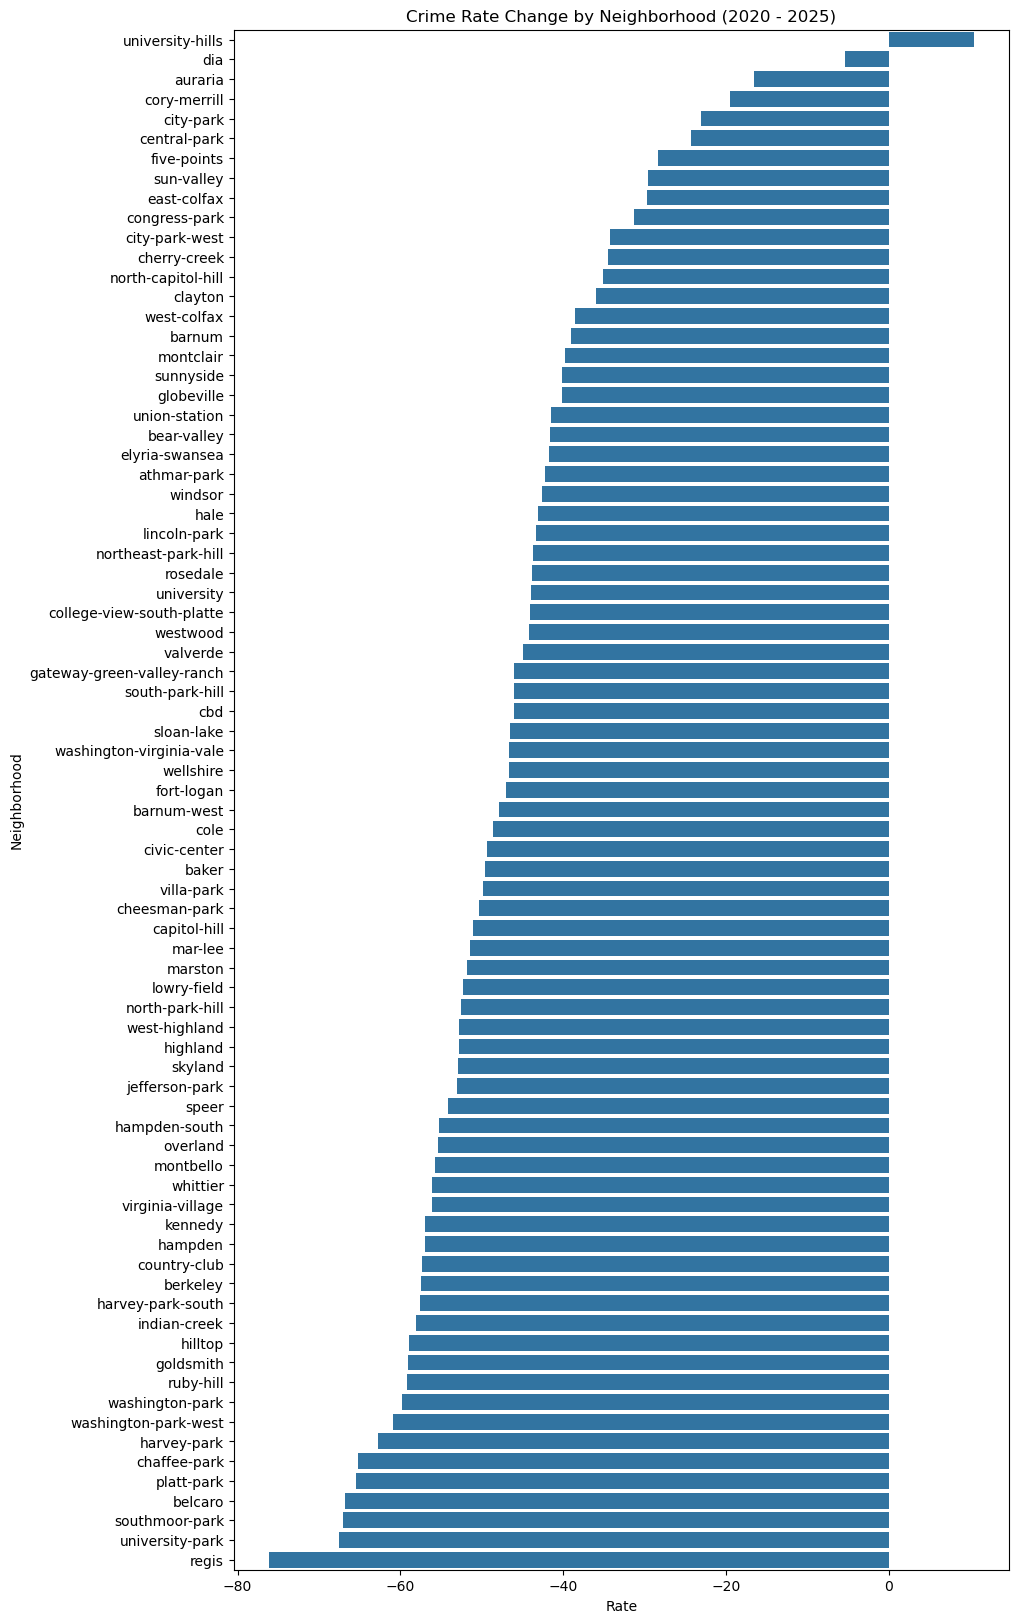

In [94]:
crimes_2020_df = crimes_df[crimes_df['OCCURRENCE_YEAR'].isin([2020])].groupby(['NEIGHBORHOOD_ID', 'OCCURRENCE_YEAR']).size().reset_index(name='COUNT')
crimes_2025_df = crimes_df[crimes_df['OCCURRENCE_YEAR'].isin([2025])].groupby(['NEIGHBORHOOD_ID', 'OCCURRENCE_YEAR']).size().reset_index(name='COUNT')

crimes_2025_df['2025_PERCENT_CHANGE'] = ((crimes_2025_df['COUNT'] - crimes_2020_df['COUNT']) / crimes_2020_df['COUNT'] * 100).round(2)

plt.figure(figsize=(10, 20))

sns.barplot(data=crimes_2025_df.sort_values(by='2025_PERCENT_CHANGE', ascending=False), x='2025_PERCENT_CHANGE', y='NEIGHBORHOOD_ID')

plt.title('Crime Rate Change by Neighborhood (2020 - 2025)')
plt.xlabel('Rate')
plt.ylabel('Neighborhood')

plt.show()